# ***TP_XGBOOST***

Dans ce TP, nous allons nous intéresser à étudier l'algorithme de XGBOOST, le comparer avec différents algorithmes et évaluer ses performances selon ces différents hyperparamètres.

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# **I. Classification**

Dans une première partie, nous allons nous intéresser à la classification. On va importer des datasets de sklearn et entraîner notre modèle de XGBOOST sur de la classification binaire et multi-classes et le comparer avec deux modèles d'arbres de décision, un modèle de régression logistique mais également 2 algortihmes de boosting: GradientBoosting et Adaboost.

### I.1 Importer les datasets

Ici ce sera une dataset binaire pour prédire si un patient est atteint du cancer ou pas : 

In [163]:
from sklearn.datasets import load_iris, fetch_covtype, load_breast_cancer  
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()   # Pour la classification binaire
X, Y = cancer.data, cancer.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((455, 30), (114, 30))

Et ici on va importer une dataset multi-classes :

In [164]:
# Charger un jeu de données Iris pour classification
# iris = load_iris()
# X_multi, Y_multi = iris.data, iris.target

covertype = fetch_covtype()
X_multi, Y_multi = covertype.data, covertype.target
Y_multi = Y_multi - 1   # car les classes dans cette dataset commencent de 1 et pas de 0 

X_multi_train, X_multi_test, Y_multi_train, Y_multi_test = train_test_split(X_multi, Y_multi, test_size=0.2, random_state=42)

X_multi_train.shape, X_multi_test.shape

((464809, 54), (116203, 54))

Cette fonction permet de switcher entre les données binaires et multiclasses en changeant le booléen binaire

In [165]:
def choix_type_classfication(binaire : bool):
    if binaire:
        return train_test_split(X, Y, test_size=0.2, random_state=42)
    else:
        return train_test_split(X_multi, Y_multi, test_size=0.2, random_state=42)
    
Xchoix_train, Xchoix_test, Ychoix_train, Ychoix_test = choix_type_classfication(True)

### I.2 Entraîner deux modèles d'arbres de décision + un modèle RandomForest

In [166]:
from   sklearn.tree    import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from   sklearn.metrics import accuracy_score, f1_score
from   sklearn         import tree
import timeit


gini_stats          = []
entropy_stats       = []
randForest_stats       = []
gini_classifieur    = DecisionTreeClassifier(criterion='gini'   , random_state=42)
entropy_classifieur = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifieur = RandomForestClassifier(n_estimators=100)


# ============ GINI ====================
# ............ Entraînement ............
temps_debut = timeit.default_timer()
gini_classifieur.fit(Xchoix_train, Ychoix_train)
gini_stats.append(timeit.default_timer() - temps_debut)
# ..... Evaluation entrainement ........
Ychoix_pred = gini_classifieur.predict(Xchoix_train)
gini_stats.append(accuracy_score(Ychoix_train, Ychoix_pred))
gini_stats.append(f1_score(Ychoix_train, Ychoix_pred, average='micro'))
# ................ Test ................
temps_debut = timeit.default_timer()
Ychoix_pred = gini_classifieur.predict(Xchoix_test)
gini_stats.append(timeit.default_timer() - temps_debut)
# ........... Evaluation test ...........
gini_stats.append(accuracy_score(Ychoix_test, Ychoix_pred))
gini_stats.append(f1_score(Ychoix_test, Ychoix_pred, average='micro'))

# =========== Entropy ==================
# ............ Entraînement ............
temps_debut = timeit.default_timer()
entropy_classifieur.fit(Xchoix_train, Ychoix_train)
entropy_stats.append(timeit.default_timer() - temps_debut)
# ..... Evaluation entrainement ........
Ychoix_pred = entropy_classifieur.predict(Xchoix_train)
entropy_stats.append(accuracy_score(Ychoix_train, Ychoix_pred))
entropy_stats.append(f1_score(Ychoix_train, Ychoix_pred, average='micro'))
# ................ Test ................
temps_debut = timeit.default_timer()
Ychoix_pred = entropy_classifieur.predict(Xchoix_test)
entropy_stats.append(timeit.default_timer() - temps_debut)
# ........... Evaluation test ...........
entropy_stats.append(accuracy_score(Ychoix_test, Ychoix_pred))
entropy_stats.append(f1_score(Ychoix_test, Ychoix_pred, average='micro'))

# =========== Random forest ==================
#............ Entraînement ............
temps_debut = timeit.default_timer()
classifieur.fit(Xchoix_train, Ychoix_train)
randForest_stats.append(timeit.default_timer() - temps_debut)
# ..... Evaluation entrainement ........
Ychoix_pred = classifieur.predict(Xchoix_train)
randForest_stats.append(accuracy_score(Ychoix_train, Ychoix_pred))
randForest_stats.append(f1_score(Ychoix_train, Ychoix_pred, average='micro'))
# ................ Test ................
temps_debut = timeit.default_timer()
Ychoix_pred = classifieur.predict(Xchoix_test)
randForest_stats.append(timeit.default_timer() - temps_debut)
# ........... Evaluation test ...........
randForest_stats.append(accuracy_score(Ychoix_test, Ychoix_pred))
randForest_stats.append(f1_score(Ychoix_test, Ychoix_pred, average='micro'))

print('Fin')

Fin


### I.3 Entraîner un modèle de régression logistique
Ce modèle supporte la régression logistique multi-classes

In [167]:
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

logistic_reg = LogisticRegression()
logistic_stats = []

# ================= Entraînement =====================
temps_debut = timeit.default_timer()
logistic_reg.fit(Xchoix_train, Ychoix_train)
logistic_stats.append(timeit.default_timer() - temps_debut)
Y_pred = logistic_reg.predict(Xchoix_train)
logistic_stats.append(accuracy_score(Ychoix_train, Y_pred))
logistic_stats.append(f1_score(Ychoix_train, Y_pred, average='micro'))

# ===================== Test ========================
temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = logistic_reg.predict(Xchoix_test)
logistic_stats.append(timeit.default_timer() - temps_debut)
logistic_stats.append(accuracy_score(Ychoix_test, Y_pred))
logistic_stats.append(f1_score(Ychoix_test, Y_pred, average='micro'))

### I.4 Entraîner trois modèles de boosting : GradientBoosting, Adaboost et Lightgbm

In [168]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import lightgbm as lgb


ADABOOST_stats = []
adaboost_clf = AdaBoostClassifier()

# ================= Entraînement Adaboost =====================
temps_debut = timeit.default_timer()
# Entraîner le modèle
adaboost_clf.fit(Xchoix_train, Ychoix_train)
ADABOOST_stats.append(timeit.default_timer() - temps_debut)
Y_pred = adaboost_clf.predict(Xchoix_train)
ADABOOST_stats.append(accuracy_score(Ychoix_train, Y_pred))
ADABOOST_stats.append(f1_score(Ychoix_train, Y_pred, average='micro'))

# ===================== Test Adaboost ========================
temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = adaboost_clf.predict(Xchoix_test)
ADABOOST_stats.append(timeit.default_timer() - temps_debut)
ADABOOST_stats.append(accuracy_score(Ychoix_test, Y_pred))
ADABOOST_stats.append(f1_score(Ychoix_test, Y_pred, average='micro'))


# ==========================================================================================

grad_stats = []
grad_boost_clf = GradientBoostingClassifier()

# ================= Entraînement Gradient Boosting =====================
temps_debut = timeit.default_timer()
# Entraîner le modèle
grad_boost_clf.fit(Xchoix_train, Ychoix_train)
grad_stats.append(timeit.default_timer() - temps_debut)
Y_pred = grad_boost_clf.predict(Xchoix_train)
grad_stats.append(accuracy_score(Ychoix_train, Y_pred))
grad_stats.append(f1_score(Ychoix_train, Y_pred, average='micro'))

# ===================== Test Gradient Boosting ========================
temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = grad_boost_clf.predict(Xchoix_test)
grad_stats.append(timeit.default_timer() - temps_debut)
grad_stats.append(accuracy_score(Ychoix_test, Y_pred))
grad_stats.append(f1_score(Ychoix_test, Y_pred, average='micro'))


# ==========================================================================================

LGBM_stats = []
lgb_clf = lgb.LGBMClassifier()

# ================= Entraînement LGBM =====================
temps_debut = timeit.default_timer()
# Entraîner le modèle
lgb_clf.fit(Xchoix_train, Ychoix_train)
LGBM_stats.append(timeit.default_timer() - temps_debut)
Y_pred = lgb_clf.predict(Xchoix_train)
LGBM_stats.append(accuracy_score(Ychoix_train, Y_pred))
LGBM_stats.append(f1_score(Ychoix_train, Y_pred, average='micro'))

# ===================== Test LGBM ========================
temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = lgb_clf.predict(Xchoix_test)
LGBM_stats.append(timeit.default_timer() - temps_debut)
LGBM_stats.append(accuracy_score(Ychoix_test, Y_pred))
LGBM_stats.append(f1_score(Ychoix_test, Y_pred, average='micro'))

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### I.5 Entraîner un modèle XGBOOST

In [169]:
import xgboost as xgb

# Définir les paramètres du modèle
# params = {
#     'objective': 'multi:softmax',  # Fonction objective pour la classification multi-classe
#     'num_class': 7,  # Nombre de classes dans le jeu de données 
#     'max_depth': 4  # Profondeur maximale de l'arbre
# }
# params = {
#     'objective': 'binary:logistic',  # Fonction objective pour la classification binaire
#     'num_class': 2, 
#     'max_depth': 3
# }
XGBOOST_stats = []

# Créer le modèle de classification (avec les paramètres par défaut)
clf = xgb.XGBClassifier()


# ================= Entraînement =====================
temps_debut = timeit.default_timer()
# Entraîner le modèle
clf.fit(Xchoix_train, Ychoix_train)
XGBOOST_stats.append(timeit.default_timer() - temps_debut)
Y_pred = clf.predict(Xchoix_train)
XGBOOST_stats.append(accuracy_score(Ychoix_train, Y_pred))
XGBOOST_stats.append(f1_score(Ychoix_train, Y_pred, average='micro'))

# ===================== Test ========================
temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = clf.predict(Xchoix_test)
XGBOOST_stats.append(timeit.default_timer() - temps_debut)
XGBOOST_stats.append(accuracy_score(Ychoix_test, Y_pred))
XGBOOST_stats.append(f1_score(Ychoix_test, Y_pred, average='micro'))

In [170]:
pd.DataFrame({
    'Criteres' : ['Temps Entrainement', 'Accuracy Entrainement', 'F1 Entrainement', 'Temps Test', 'Accuracy Test', 'F1 Test'],
    'Entropie' : entropy_stats,
    'Gini'     : gini_stats,
    'Régression logistique': logistic_stats,
    'Random Forest' : randForest_stats,
    'Gradient Boosting': grad_stats,
    'Adaboost' : ADABOOST_stats,
    'XGBOOST'  : XGBOOST_stats,
})

,Criteres,Entropie,Gini,Régression logistique,Random Forest,Gradient Boosting,Adaboost,XGBOOST
0,Temps Entrainement,0.024254,0.033134,0.153103,0.550847,2.238101,0.499412,0.127456
1,Accuracy Entrainement,1.000000,1.000000,0.953846,1.000000,1.000000,1.000000,1.000000
2,F1 Entrainement,1.000000,1.000000,0.953846,1.000000,1.000000,1.000000,1.000000
3,Temps Test,0.000582,0.000533,0.000620,0.005979,0.000859,0.010096,0.001716
4,Accuracy Test,0.947368,0.947368,0.956140,0.964912,0.956140,0.973684,0.956140
5,F1 Test,0.947368,0.947368,0.956140,0.964912,0.956140,0.973684,0.956140


### I.6 Conclusion
Nous remarquons que les performances de XGBOOST par rapport au reste des algorithmes sont très intéressantes car il jumle entre une très bonne rapidité et taux d'accuracy ou F1-score. En effet, il est de loin plus rapide que les deux algorithmes de boosting ainsi que l'algorithme de Bootstrap, les restants sont plus ou moins rapides mais sont moins performants selon les métriques utilisées.

# **II. Régression**

Dans cette seconde partie, nous allons entraîner un modèle de XGBOOST pour la régression et le comparer avec le modèle de régression linéaire, Gradient Boosting et Adaboost en utilisant une dataset de Sklearn comportant les prix des maisons de California.

### II.1 Importer la dataset

In [119]:
from sklearn.datasets import fetch_california_housing

houses = fetch_california_housing()
X, Y = houses.data, houses.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

### II.2 Entraîner un modèle de régression linéaire

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import make_pipeline
from sklearn.metrics import mean_squared_error

lineaire_stats = []

reg_lineaire = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

temps_debut = timeit.default_timer()
# Entraîner le modèle de régression linéaire
reg_lineaire.fit(X_train, Y_train)
lineaire_stats.append(timeit.default_timer() - temps_debut)

temps_debut = timeit.default_timer()
# Prédire
Y_pred_lineaire = reg_lineaire.predict(X_test)
lineaire_stats.append(timeit.default_timer() - temps_debut)

# Calculer l'erreur quadratique moyenne (MSE)
mse_lineaire = mean_squared_error(Y_test, Y_pred_lineaire)
lineaire_stats.append(mse_lineaire)
print(f"MSE: {mse_lineaire}")

MSE: 0.5558915986952462


### II.3 Entraîner un modèle Adaboost et un autre Gradient Boosting

In [121]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

ADABOOST_stats = []
adaboost_reg = AdaBoostRegressor()

temps_debut = timeit.default_timer()
# Entraîner le modèle
adaboost_reg.fit(X_train, Y_train)
ADABOOST_stats.append(timeit.default_timer() - temps_debut)

temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = adaboost_reg.predict(X_test)
ADABOOST_stats.append(timeit.default_timer() - temps_debut)

# Calculer l'erreur quadratique moyenne (MSE)
mse_adaboost = mean_squared_error(Y_test, Y_pred)
ADABOOST_stats.append(mse_adaboost)
print(f"MSE: {mse_adaboost}")


# ==========================================================================================

grad_stats = []
grad_boost_reg = GradientBoostingRegressor()

temps_debut = timeit.default_timer()
# Entraîner le modèle
grad_boost_reg.fit(X_train, Y_train)
grad_stats.append(timeit.default_timer() - temps_debut)

temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred = grad_boost_reg.predict(X_test)
grad_stats.append(timeit.default_timer() - temps_debut)

# Calculer l'erreur quadratique moyenne (MSE)
mse_grad = mean_squared_error(Y_test, Y_pred)
grad_stats.append(mse_grad)
print(f"MSE: {mse_grad}")

MSE: 0.8723019294589596
MSE: 0.29399732486438634


### II.4 Entraîner un modèle XGBOOST

In [122]:
# Définir les paramètres du modèle
params = {
    'objective': 'reg:squarederror',  # Fonction objective pour la régression
    'max_depth': 3  # Profondeur maximale de l'arbre
}

XGBOOST_stats = []

# Créer le modèle de régression XGBOOST avec les paramètres, changer la profondeur change le MSE, plus profond mieux c'est mais prend plus de temps
reg_XGBOOST = xgb.XGBRegressor(**params)

temps_debut = timeit.default_timer()
# Entraîner le modèle
reg_XGBOOST.fit(X_train, Y_train)
XGBOOST_stats.append(timeit.default_timer() - temps_debut)

temps_debut = timeit.default_timer()
# Faire des prédictions sur l'ensemble de test
Y_pred_XGBOOST = reg_XGBOOST.predict(X_test)
XGBOOST_stats.append(timeit.default_timer() - temps_debut)

# Calculer l'erreur quadratique moyenne (MSE)
mse_XGBOOST = mean_squared_error(Y_test, Y_pred_XGBOOST)
XGBOOST_stats.append(mse_XGBOOST)
print(f"MSE: {mse_XGBOOST}")


MSE: 0.2509968715591795


In [123]:
pd.DataFrame({
    'Criteres' : ['Temps Entrainement','Temps Test', 'MSE'],
    'Linéaire' : lineaire_stats,
    'Gradient Boosting': grad_stats,
    'Adaboost': ADABOOST_stats,
    'XGBOOST'  : XGBOOST_stats,
})

,Criteres,Linéaire,Gradient Boosting,Adaboost,XGBOOST
0,Temps Entrainement,0.017756,12.180016,2.927409,0.149950
1,Temps Test,0.001505,0.007961,0.028228,0.002287
2,MSE,0.555892,0.293997,0.872302,0.250997


### II.5 Conclusion
Nous remarquons que XGBOOST est non seulement très rapide par rapport aux deux autres algorithmes de boosting, mais aussi bien plus précis avec une MSE bien inférieure avec quoi il compense sa lenteur par rapport à la régression linéaire

# **III. Exploration des Hyperparamètres**

Dans cette section, nous examinerons plusieurs Hyperparamètres importants et comprendrons leurs fonctions

In [124]:
bookings = pd.read_csv('data/hotel_bookings.csv')
bookings.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [125]:
# Define X and y
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

In [126]:
# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)

# Instatiate a XGBClassifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [127]:
# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

In [128]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.8382308083375699


In [129]:
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier with 25 boosting rounds
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

### **Max depth**

_Depuis la documentation de XGBoost :_
> Profondeur maximale d'un arbre. Augmenter cette valeur rendra le modèle plus complexe et plus susceptible de surajuster.

<p align="center">
<img src="https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/max_depth.png?raw=true" width = "35%"> 
</p>

Voyons ce qui se passe lorsque nous augmentons la valeur de `max_depth` de 6 à 20.


In [130]:
# Set max_depth to 10
xgb_clf.set_params(max_depth=20)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.853329944077275

### **colsample_bytree**

_Depuis la documentation de XGBoost :_

> Le taux de sous-échantillonnage des colonnes lors de la construction de chaque arbre. Le sous-échantillonnage se produit une fois pour chaque arbre construit.

Essentiellement, cela nous permet de limiter le nombre de colonnes utilisées lors de la construction de chaque arbre. Cela ajoute de l'aléatoire, rendant le modèle plus robuste au bruit. La valeur par défaut est 1 (c'est-à-dire toutes les colonnes), essayons une valeur plus petite.

<p align="center">
<img src="https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/colsample_bytree.gif?raw=true" width = "55%"> 
</p>

In [131]:
# Set colsample_bytree to 0.5 
xgb_clf.set_params(colsample_bytree=0.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8552872394509405

Nous pouvons également limiter le nombre de colonnes utilisées à chaque niveau de profondeur ou nœud de notre arbre.

_Selon la documentation de XGBoost :_

> `colsample_bylevel` est le taux de sous-échantillonnage des colonnes pour chaque niveau. Le sous-échantillonnage se produit une fois pour chaque nouveau niveau de profondeur atteint dans un arbre. Les colonnes sont sous-échantillonnées à partir de l'ensemble des colonnes choisies pour l'arbre en cours.

> `colsample_bynode` est le taux de sous-échantillonnage des colonnes pour chaque nœud (division). Le sous-échantillonnage se produit chaque fois qu'une nouvelle division est évaluée. Les colonnes sont sous-échantillonnées à partir de l'ensemble des colonnes choisies pour le niveau en cours.

### **subsample**

_Selon la documentation de XGBoost :_

> - Taux de sous-échantillonnage des instances d'entraînement. Le régler sur 0.5 signifie que XGBoost échantillonnera de manière aléatoire la moitié des données d'entraînement avant de développer les arbres, ce qui permettra d'éviter le surajustement. 
> - Le sous-échantillonnage se produira une fois à chaque itération.
> - range: (0,1]

La valeur par défaut est 1, essayons 0.75.

Cela signifie que chacun de nos 25 arbres recevra un échantillonnage aléatoire de 75 % de nos données d'entraînement. Chaque arbre s'entraînera sur différentes parties des données, ce qui ajoute de l'aléatoire (similaire à `colsample_bytree`). 

<p align="center">
<img src="https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/subsample.gif?raw=true" width = "55%"> 
</p>

Cependant, nous ne voulons pas que cette valeur soit trop basse si nous n'avons pas beaucoup d'arbres, car notre modèle risquerait de ne pas voir suffisamment de données et de ne pas s'ajuster correctement.

In [132]:
# Set subsample to 0.75 
xgb_clf.set_params(subsample=0.75)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8501016776817488

### **gamma**

_Selon la documentation de XGBoost :_
> - Perte minimale requise pour effectuer une partition supplémentaire sur un nœud feuille de l'arbre. Plus gamma est grand, plus l'algorithme sera conservateur.
> - range: [0,∞]


Cela décide si un nœud se scindera en fonction de la réduction de perte attendue après la division. `gamma` représente la perte minimale requise pour qu'un nœud se scinde.

<p align="center">
<img src="https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/gamma.png?raw=true" width = "55%"> 
</p>

Augmenter `gamma` = moins de divisions = moins de complexité

La valeur par défaut est 0, donc dans notre cas, les nœuds se sont toujours divisés jusqu'à la profondeur maximale. Augmentons cela à 0.25.

In [133]:
# Set gamma to .25 
xgb_clf.set_params(gamma=0.25)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.850127097102186

### **Learning Rate (eta)**

_Selon la documentation de XGBoost :_
> - Taux de réduction utilisé dans la mise à jour pour prévenir le surajustement. Après chaque étape d'amplification, nous pouvons obtenir directement les poids des nouvelles fonctionnalités, et eta réduit les poids des fonctionnalités pour rendre le processus de boosting plus conservateur.
> - range: [0,1]

Le taux d'apprentissage affecte la rapidité avec laquelle un modèle apprend.

Le boosting gradient fonctionne en ajoutant séquentiellement des faibles apprenants au modèle. Chaque nouveau faible apprenant tente de corriger les erreurs résiduelles des arbres précédents. Cela rend le modèle très susceptible de surajustement. Le taux d'apprentissage peut aider à ralentir l'apprentissage en réduisant les poids résultants de l'arbre actuel avant de les transmettre à l'arbre suivant.

Le taux d'apprentissage actuel de notre modèle est de 0.1. Que se passe-t-il si nous le changeons à 0.3 ?

In [134]:
# Set learning rate to .3 
xgb_clf.set_params(learning_rate=0.3)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.850127097102186

Le taux d'apprentissage et le nombre d'arbres doivent être ajustés ensemble. Si nous diminuons le taux d'apprentissage, nous devons nous assurer d'avoir suffisamment d'arbres pour apprendre quelque chose et éviter un sous-ajustement sévère. **Par conséquent, un faible taux d'apprentissage nécessitera davantage de cycles de boosting.**

### **reg_alpha**

_Selon la documentation de XGBoost :_
> Terme de régularisation L1 sur les poids. Augmenter cette valeur rendra le modèle plus conservateur.

L1 est souvent appelé **régression Lasso**. Il s'agit d'une technique de régularisation fondamentale, ce qui signifie qu'elle vise à réduire le surajustement en décourageant les modèles complexes. Dans le cas du boosting gradient, L1 le fait en ajoutant des pénalités sur les poids des feuilles. Augmenter alpha conduit les poids des feuilles des apprenants de base vers 0.

La valeur par défaut est 0, ce qui signifie qu'il n'y a actuellement aucune régularisation alpha dans notre modèle. Activons L1 avec une valeur de `0.01`.

In [135]:
# set reg_alpha to .1 
xgb_clf.set_params(reg_alpha=0.01)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.850127097102186

**L2**, également connue sous le nom de régression ridge, est également disponible avec le paramètre reg_lambda. L2 est réputée pour avoir une pénalité plus douce que L1. Cela signifie que les poids des feuilles diminuent de manière plus régulière, avec moins de risque de parcimonie dans les poids des feuilles. Assurez-vous donc d'essayer différentes techniques de régularisation !

Examinons les paramètres résultants après les avoir modifiés manuellement.

In [136]:
# Print the model parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.25,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 20,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Il existe de nombreuses combinaisons possibles de paramètres. Nous ne pouvons pas les ajuster manuellement et les choisir.

### **Effets de quelques hyperparamètres sur le modèle**
Nous allons faire l'étude sur une dataset de classification (diabetes) mais c'est exactement la même chose avec de la régression.

In [157]:
data = pd.read_csv('./data/diabetes.csv', skipinitialspace=True)

X, Y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=.2, random_state=42)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
# XGBoost (Avec différents taux d'apprentissage)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

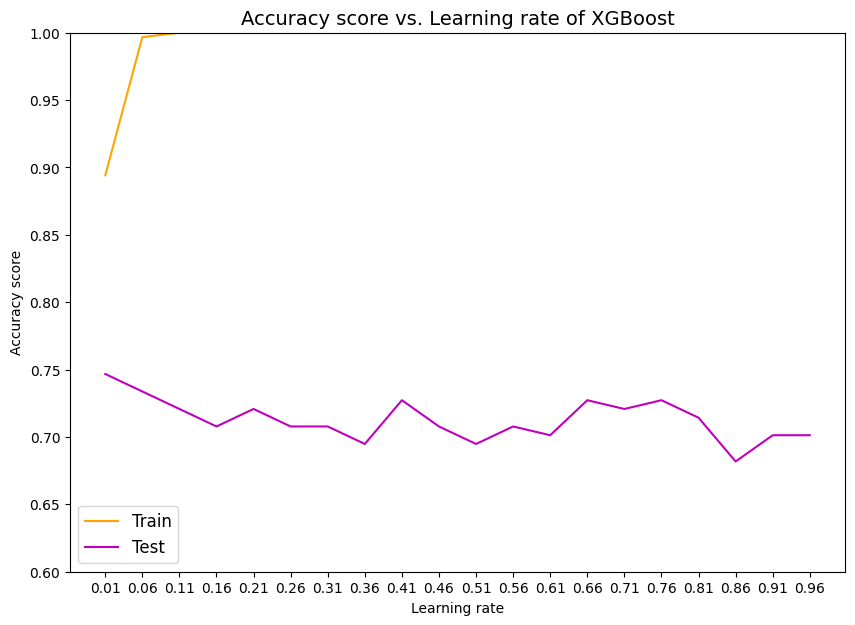

In [155]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

#### Interprétation
Les résultats sont vraiment bons (>80%) pour le training et ça converge vite mais on remarque très facilement le problème d'overfitting qui se produit dans le test set (test accuracy diminue très vite), d'où l'intérêt d'appliquer une régularisation avec d'autres hyperparamètres.

En général, nous pouvons réduire le nombre d'itérations (n_estimators) et le taux d'apprentissage (learning_rate), ou augmenter le gain minimum requis dans un nœud (gamma) et le paramètre de régularisation (reg_lambda), de sorte que le modèle ne puisse pas apprendre trop précisément les caractéristiques de l'ensemble d'entraînement.

Dans cet exemple, nous allons seulement ajuster reg_lambda à 1 et rechercher de manière exhaustive le poids minimum des enfants (min_child_weight) optimal pour réduire le problème de surajustement. Dans le monde réel, nous pouvons utiliser une recherche exhaustive (grid search) et une validation croisée K-fold pour trouver la meilleure combinaison de paramètres.

On va notamment ajuster la plage des valeurs du learning rate convenablement pour éviter la forte baisse d'accuracy.

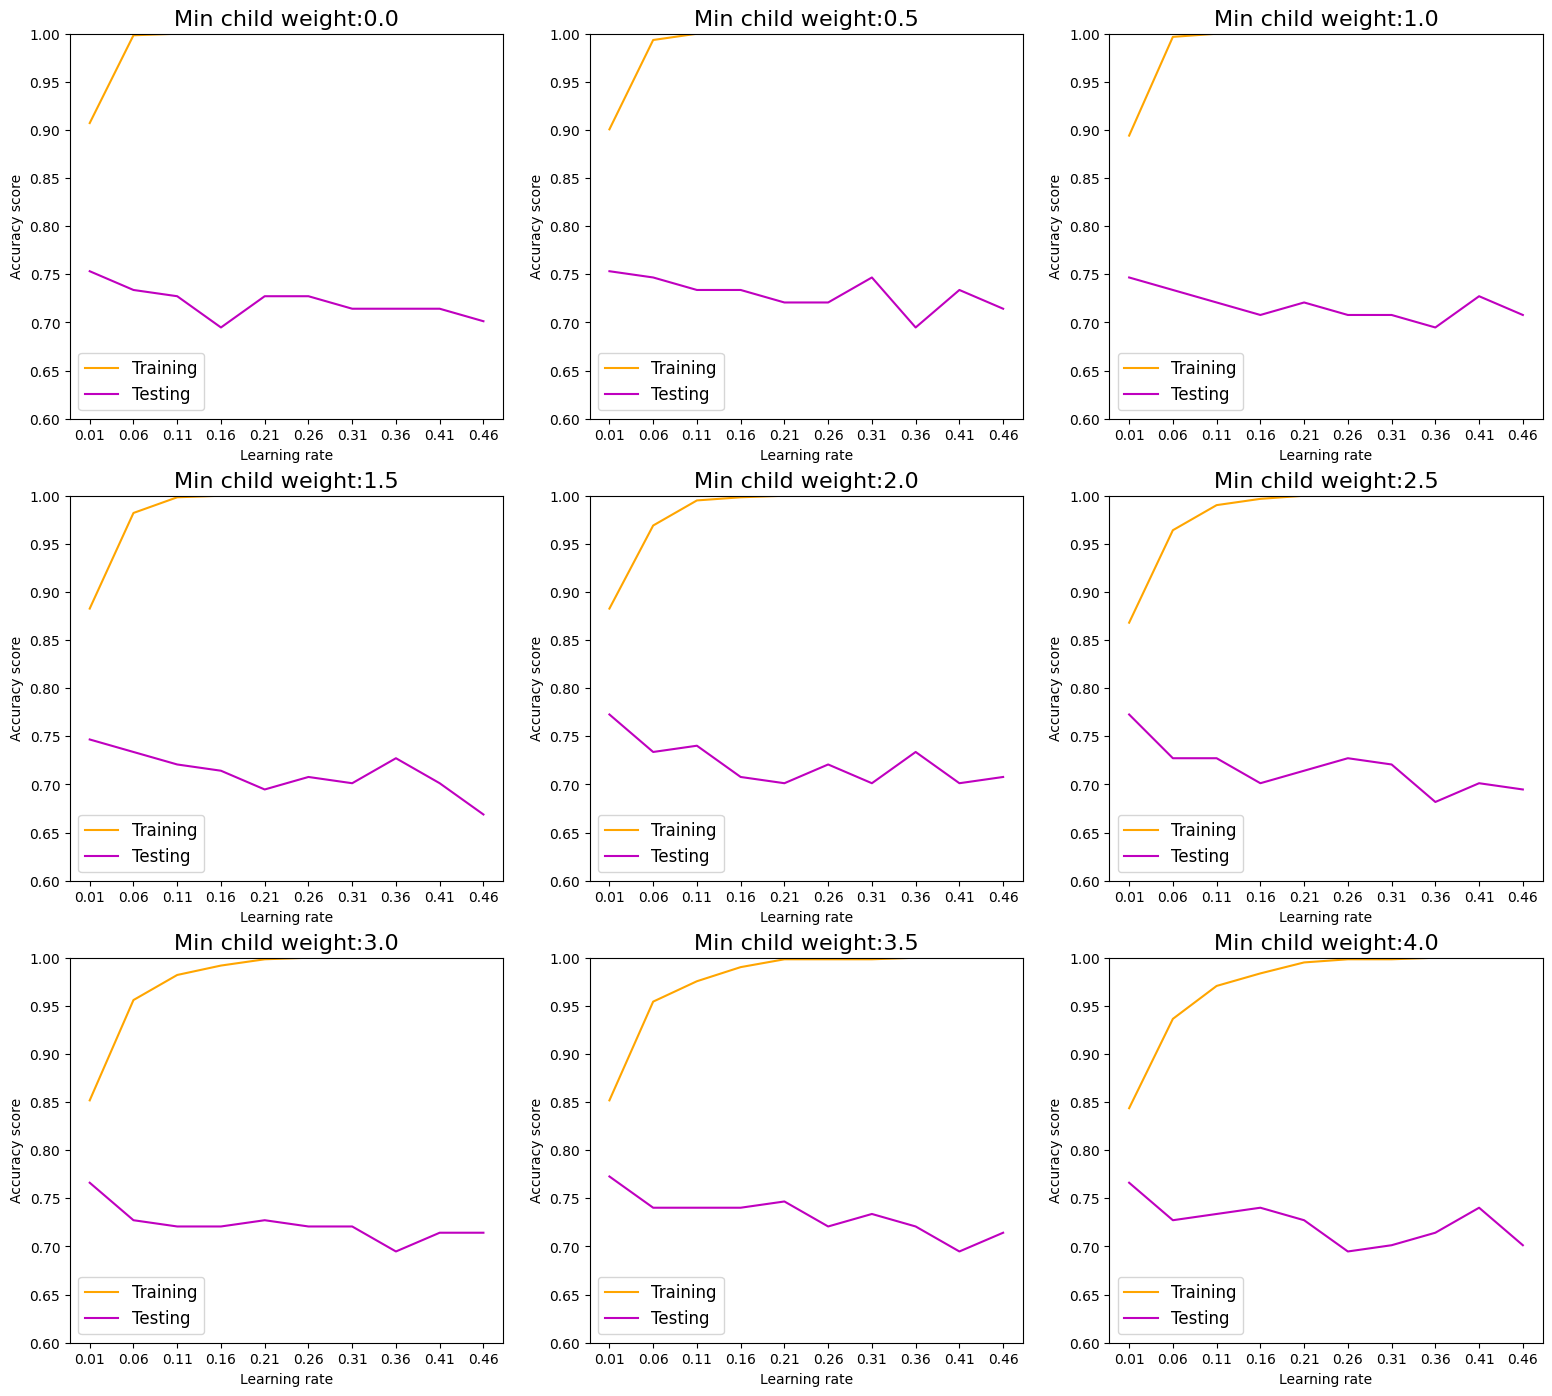

In [156]:
# new learning rate range
learning_rate_range = np.arange(0.01, 0.5, 0.05)
fig = plt.figure(figsize=(19, 17))
idx = 1
# grid search for min_child_weight
for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(X_train, y_train)
        train.append(xgb_classifier.score(X_train, y_train))
        test.append(xgb_classifier.score(X_test, y_test))
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()

On remaque que jouer sur la paramètre min_child_width permet de diminuer le sur-apprentissage et rapprocher légèrement les deux graphes de train et test. On peut également voir que la valeur qui permet de minimiser le sur-apprentissage est min_child_width=3.5.

Cet exemple démontre la puissance de XGBoost et sa flexibilité en termes d'ajustement des paramètres. De plus, si vous exécutez l'algorithme sur votre machine, vous constaterez qu'il est en réalité rapide en raison de sa nature de calcul parallèle.

Cependant, nous devrions toujours accorder une attention particulière au problème du sur-apprentissage. Les algorithmes de boosting, y compris XGBoost, peuvent apprendre les données d'entraînement de manière trop précise et détaillée, échouant à capturer la tendance générale. Heureusement, nous pouvons toujours ajuster les paramètres pour limiter sa capacité d'apprentissage jusqu'à ce que nous trouvions un niveau de sur-apprentissage acceptable.